In [1]:
 ## Classification with neural network

In [2]:
## Creating a demo data 
from sklearn.datasets import make_circles
import tensorflow as tf

# make 1000 example 
n_sample = 5000

X, y = make_circles(n_sample, noise=0.03, random_state=42)

In [3]:
X

array([[-0.75016489, -0.56389205],
       [ 0.78974434,  0.12875006],
       [ 0.74764022,  0.3065477 ],
       ...,
       [ 0.08857395,  0.84781275],
       [-0.76354876, -0.02878492],
       [-0.57873523,  0.84304373]])

In [4]:
y[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5]:
import pandas as pd 

circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
X = circles[['X0', 'X1']] 
y = circles['label']

X.shape, y.shape

((5000, 2), (5000,))

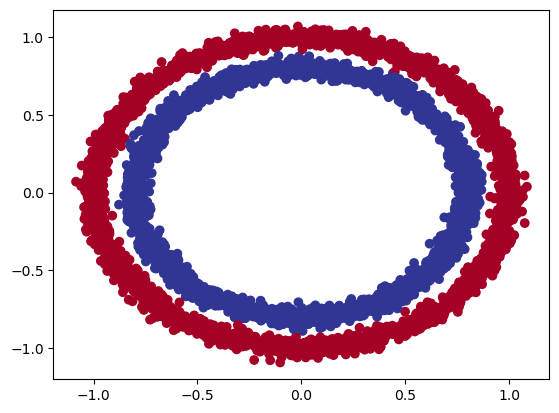

In [6]:
## Visualize 

import matplotlib.pylab as plt 
plt.scatter(x=X['X0'], y=X['X1'], c=y, cmap=plt.cm.RdYlBu)

In [7]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
], name="model_1")

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model_history = model_1.fit(X, y, epochs=50)

Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:1214: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4890 - loss: 1.2110
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5354 - loss: 0.6903
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6412 - loss: 0.6624
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.6254
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9168 - loss: 0.5541
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9666 - loss: 0.4379
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.3076
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.2000
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.1307
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0897
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0650
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

<Axes: >

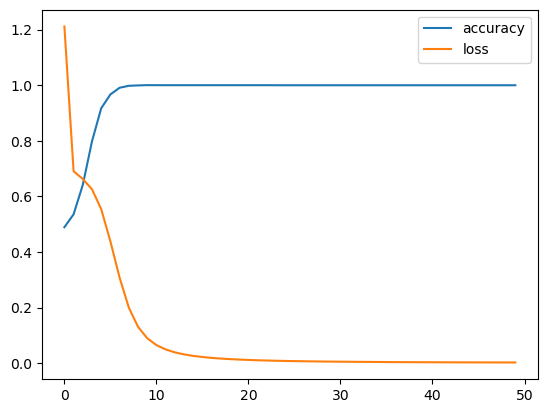

In [8]:
import pandas as pd 
pd.DataFrame(model_history.history).plot()

In [9]:
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,862 (19.00 KB)

 Trainable params: 1,620 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,242 (12.67 KB)

### Finding the best learning rate

### using learning rate callback

In [19]:
tf.random.set_seed(43)

#create your model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics= ['accuracy']
)

## learning rate Callback 
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_2.fit(X, y, epochs=50, callbacks=[lr_callback])

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5000 - loss: 0.6919 - learning_rate: 1.0000e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.6913 - learning_rate: 1.1220e-04
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.6907 - learning_rate: 1.2589e-04
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5044 - loss: 0.6900 - learning_rate: 1.4125e-04
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 0.6892 - learning_rate: 1.5849e-04
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 0.6884 - learning_rate: 1.7783e-04
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5160 - loss: 0.6874 - learning_rate: 1.9953e-04
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 0.6864 - learning_rate: 2.2387e-04
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 0.6852 - 

<Axes: >

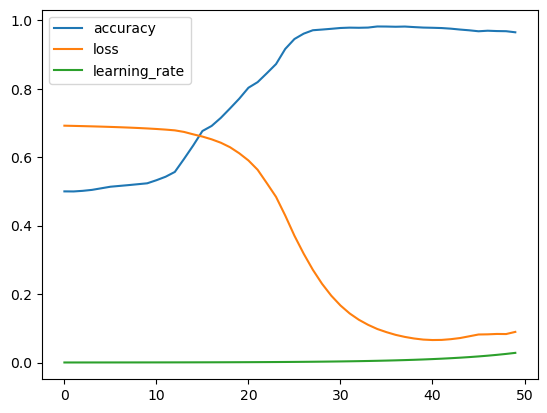

In [20]:
pd.DataFrame(history.history).plot()

<Axes: >

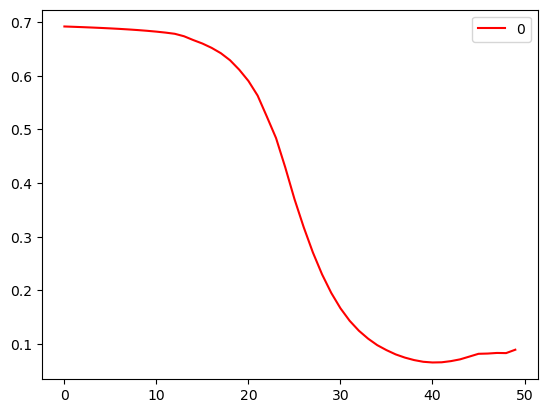

In [26]:
pd.DataFrame(history.history['loss']).plot( c='r' )

In [29]:
## Evaluation metrics 
# Accuracy 
loss, accuracy = model_2.evaluate(X, y)
loss, accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9472 - loss: 0.1226


(0.12262093275785446, 0.9472000002861023)

In [37]:
## Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_2.predict(X)
confusion_matrix(y, tf.round(y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[2462,   38],
       [ 226, 2274]], dtype=int64)

ValueError: Format specifier missing precision

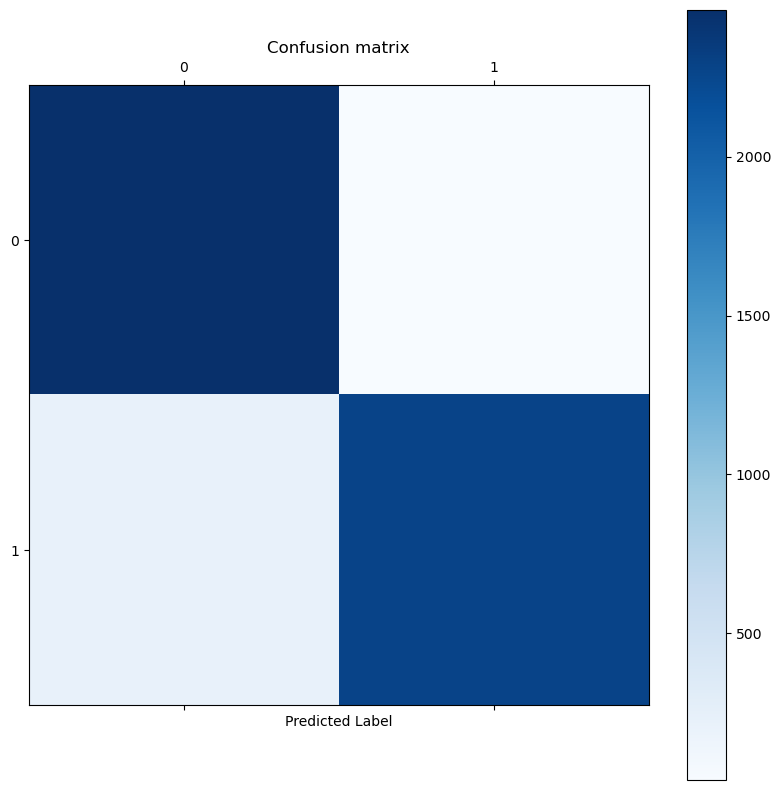

In [48]:
import itertools
import numpy as np 
figsize = (10, 10)

## create confusion metrics 
cm = confusion_matrix(y, tf.round(y_pred))
cn_norm = cm.astype('float') /  cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# lets prettify it

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax) 

classes = False
if classes:
    labels = classes
else: 
    labels = np.arange(cm.shape[0])


ax.set(
    title = 'Confusion matrix',
    xlabel = 'Predicted Label',
    xticks = np.arange(n_classes), 
    yticks = np.arange(n_classes), 
    xticklabels=labels,
    yticklabels=labels
)

thresold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cn_norm[i, j]*100:.lf}%)",
            horizontalalignment='center', 
             color='white' if cm[i, j] > thresold else 'black', 
             size=15)

In [41]:
cn_norm

array([[0.9848, 0.0152],
       [0.0904, 0.9096]])